# Resposta via Série de Fourier

## Teoria
Supondo que a  força aplicada seja periódica, com frequência fundamental $\omega = 2\pi/\tau$, podemos escrevê-la como

$$ f(t) = \frac{a_0}{2} + \sum_{j=1}^\infty
\left[ a_j \cos(j \omega t) + b_j \sin(j \omega t) \right],$$
com
$$ a_j = \int_0^\tau f(t) \cos(j\omega t)\, dt, \quad
   b_j = \int_0^\tau f(t) \sin(j\omega t)\, dt. $$

## Resposta
Neste caso, a resposta é dada por

$$x(t) = \frac{a_0}{2k} + 
\sum_{j=1}^{\infty}
\left[ \frac{a_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\cos(j\omega t - \phi_j)
+
 \frac{b_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\sin(j\omega t - \phi_j)
 \right],$$
com 
$$ r = \frac{\omega}{\omega_n}, \quad \tan \phi_j  = \frac{2j\zeta r}{1-(jr)^2}.$$

## Setup

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy.abc import t # Não usar como variável do Python!!!
%matplotlib inline

## Sistema mecânico

In [9]:
m = 1
c = 1.2
k = 40

## Propriedades dinâmicas

In [10]:
wn = np.sqrt(k/m)
cc = 2*m*wn
zeta = c/cc
print(f"Frequência natural: {wn:.3g} rad/s, Razão de amortecimento: {zeta:.3g}")
print(f"Período natural: {2*np.pi/wn:.3g} s.")

Frequência natural: 6.32 rad/s, Razão de amortecimento: 0.0949
Período natural: 0.993 s.


## Força aplicada

Temos que fornecer uma força periódica e sua série de fourier.
Vamos usar uma onda quadrada.

A figura abaixo mostra um período da força.


### Pulso quadrado

Período Fundamental: 30 s.
Frequência Fundamental: 0.209 rad/s


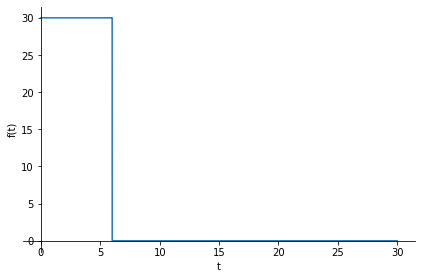

In [11]:
tau = 30
mag = 30
w0 = 2*np.pi/tau
nterm = 21             # for the numerical computation down below

square_pulse = sp.Piecewise((mag, t<tau/5),(0, True))
print(f"Período Fundamental: {tau:.3g} s.")
print(f"Frequência Fundamental: {w0:.3g} rad/s")
p = sp.plot(square_pulse, (t, 0, tau))

### Dente de serra

Período Fundamental: 2 s.
Frequência Fundamental: 3.14 rad/s


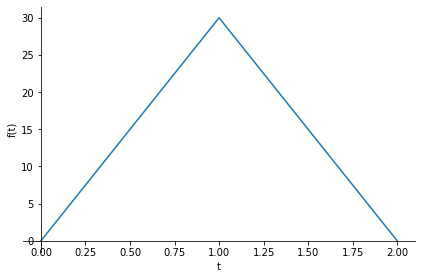

In [12]:
tau = 2
mag = 30
w0 = 2*np.pi/tau
nterm = 7             # for the numerical computation down below

saw_tooth = sp.Piecewise((mag*t, t<tau/2), (-mag*(t-tau), t>tau/2), (0, True))
print(f"Período Fundamental: {tau:.3g} s.")
print(f"Frequência Fundamental: {w0:.3g} rad/s")
p = sp.plot(saw_tooth, (t, 0, tau))

### Nice wave

Apesar de bonitinha, o SymPy não consegue calcular os coeficientes de Fourier desta função analicamente!

Período Fundamental: 2 s.
Frequência Fundamental: 3.14 rad/s


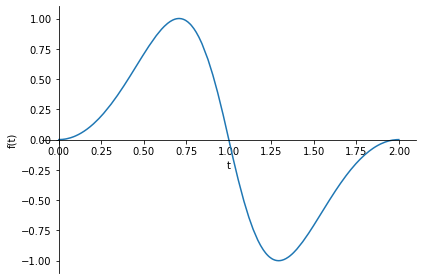

In [13]:
tau = 2
mag = 30
w0 = 2*np.pi/tau
nterm = 7             # for the numerical computation down below

#f1 = sp.Piecewise((sp.sin(w0*(2*t/tau)**2), t<tau/2), (0, True))
f1 = sp.sin(w0*(2*t/tau)**2)
f2 = -f1.subs(t, t-tau)
nice_wave = sp.Piecewise((f1, t<tau/2), (f2, t>=tau/2), (0, True))
print(f"Período Fundamental: {tau:.3g} s.")
print(f"Frequência Fundamental: {w0:.3g} rad/s")
p = sp.plot(nice_wave, (t, 0, tau))

## Série de Fourier
Escolha uma das funções definidas acima, ou defina a sua própria, de forma compatível.

In [ ]:
f = square_pulse
# f = saw_tooth
#f = nice_wave
s = sp.fourier_series(f, (t, 0, tau))
display(s)

Podemos examinar diretamente os coeficientes, o que é interessante neste caso.

In [ ]:
display(s.a0) # constant term
display(s.an) # cosine terms
display(s.bn) # sine terms

In [ ]:
sk = s.truncate(nterm)
display(sk)
fp = sp.plot(f, sk, (t, 0, tau), show=False)
fp[0].line_color = "green"
fp[1].line_color = "red"
fp.show()

In [ ]:
final_time = 4*tau
npoints = int(np.ceil(final_time*300))
sn = sp.lambdify(t, sk, 'numpy')
fig, ax = plt.subplots()
times = np.linspace(0, final_time, npoints, endpoint=True)
ax.plot(times, sn(times))
fig.set_size_inches(12,9)
#fig.show()

## Resposta

É necessário separar os coeficientes $a_n$ e $b_n$ para calcular a série da resposta.

Também vamos usar um número finito de termos da série.

In [ ]:
nterm = 12
a0 = s.a0
aj_terms = [a.evalf() for a in s.an[:nterm]] # get rid of rationals
bj_terms = [b.evalf() for b in s.bn[:nterm]]
aj = [a.as_two_terms()[0] if a != 0 else 0 for a in aj_terms]
bj = [b.as_two_terms()[0] if b != 0 else 0 for b in bj_terms]
display(aj)
display(bj)

### Magnitude dos coefiecientes
É interessante examinar a magnitude dos termos das séries em cosseno e seno.

In [ ]:
ws = np.linspace(0, nterm*w0, nterm+1)
width = 0.1*w0

fig, ax = plt.subplots()
rects1 = ax.bar(ws - width/2, [a0]+aj, width, label=r'$a_j$')
rects2 = ax.bar(ws + width/2, [0]+bj, width, label=r'$b_j$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Coeficientes da série de Fourier')
ax.set_xlabel('Frequência (rad/s)')
ax.legend()
fig.set_size_inches(10, 8)
fig.tight_layout()


## Coeficientes da Resposta

In [ ]:
r = w0/wn
js = range(1, len(aj)+1)
fs = [1/(k*sp.sqrt(((1 - (j*r)**2)**2 + (2*j*zeta*r)**2))) for j in js]
Aj = [a*f for a, f in zip(aj, fs)]
Bj = [b*f for b, f in zip(bj, fs)]

fig, ax = plt.subplots()
rects1 = ax.bar(ws - width/2, [a0]+Aj, width, label=r'$A_j$')
rects2 = ax.bar(ws + width/2, [0]+Bj, width, label=r'$B_j$')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Coeficientes da Resposta')
ax.set_xlabel('Frequência (rad/s)')
ax.legend()
fig.set_size_inches(10, 8)
fig.tight_layout()


## Ângulos de fase

In [ ]:
phij = [sp.atan2(2*j*zeta*r, 1-j**2*r**2).evalf() for j in js]        

## Resposta

In [ ]:
xt = a0/(2*k)
for A, B, j, phi in zip(Aj, Bj, js, phij):
    xt += A*sp.cos(j*w0*t-phi) + \
            B*sp.sin(j*w0*t-phi)

display(xt)

p = sp.plot(xt, (t, 0, 5*tau), size=(10, 8), xlim=(0, 1.1*5*tau), adaptive=False, nb_of_points=600)